## **PROBLEM**

 It is much more expensive to sign in a new client than keeping an existing one. It is advantageous for banks to know what leads a client towards the decision to leave the company. Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

## **OBJECTIVE**

Create a model to predict which clients will leave the bank.

## **CONTENT**

**RowNumber**—corresponds to the record (row) number and has no effect on the output\
**CustomerId**—contains random values and has no effect on customer leaving the bank\
**Surname**—the surname of a customer has no impact on their decision to leave the bank\
**CreditScore**—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank\
**Geography**—a customer’s location can affect their decision to leave the bank\
**Gender**—it’s interesting to explore whether gender plays a role in a customer leaving the bank\
**Age**—this is certainly relevant, since older customers are less likely to leave their bank than younger ones\
**Tenure**—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank\
**Balance**—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances\
**NumOfProducts**—refers to the number of products that a customer has purchased through the bank\
**HasCrCard**—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank\
**IsActiveMember**—active customers are less likely to leave the bank\
**EstimatedSalary**—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries\
**Exited**—whether or not the customer left the bank\


## **IMPORT PACKAGE**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, make_scorer,accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from jcopml.feature_importance import mean_score_decrease

C:\Users\muham\AppData\Local\Temp\ipykernel_12620\2936574223.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
pd.set_option('display.max_columns', None)

## **DATA**

In [4]:
df = pd.read_csv('churn.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **DATA UNDERSTANDING**

Avg Credit Score

In [5]:
data1 = pd.DataFrame(\
                     df.groupby(by=["Exited"])["CreditScore"]\
                     .mean()\
                     .reset_index(name='Avg Credit Score'))
data1

,Exited,Avg Credit Score
0,0,651.853196
1,1,645.351497


Overal Distribution by Geography

In [6]:
data2 = pd.DataFrame(\
                     df.groupby(by=["Geography"])["CustomerId"]\
                     .count()\
                     .sort_values(ascending=False)\
                     .reset_index(name='Distribution by Geography'))
data2

,Geography,Distribution by Geography
0,France,5014
1,Germany,2509
2,Spain,2477


Churn Distribution by Geography

In [7]:
data3 = pd.DataFrame(\
                     df[df["Exited"]==1].groupby(by=["Geography"])["CustomerId"]\
                     .count()\
                     .sort_values(ascending=False)\
                     .reset_index(name='Distribution by Geography'))
data3

,Geography,Distribution by Geography
0,Germany,814
1,France,810
2,Spain,413


Overal Distribution by Gender

In [8]:
data4 = pd.DataFrame(\
                     df.groupby(by=["Gender"])["CustomerId"]\
                     .count()\
                     .sort_values(ascending=False)\
                     .reset_index(name='Distribution by Gender'))
data4

,Gender,Distribution by Gender
0,Male,5457
1,Female,4543


Churn Distribution by Gender

In [9]:
data5 = pd.DataFrame(\
                     df[df["Exited"]==1].groupby(by=["Gender"])["CustomerId"]\
                     .count()\
                     .sort_values(ascending=False)\
                     .reset_index(name='Distribution by Gender'))
data5

,Gender,Distribution by Gender
0,Female,1139
1,Male,898


Overal Distribution by Age

<Axes: title={'center': 'Overal Distribution by Age'}, xlabel='Age', ylabel='People'>

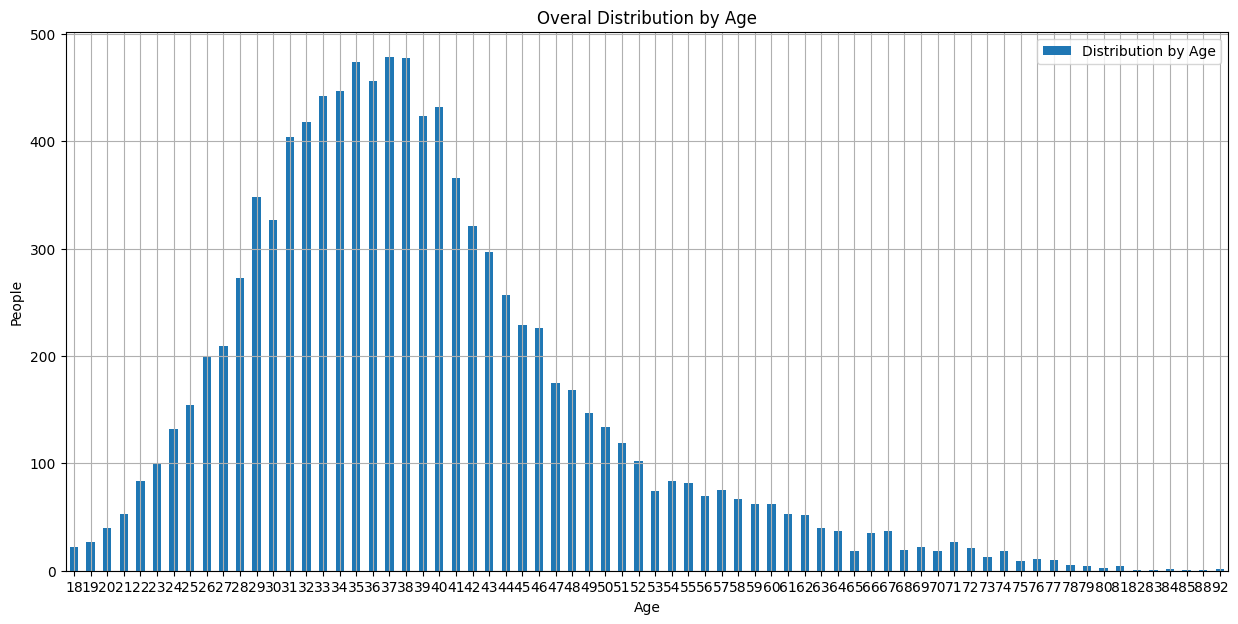

In [10]:
data6 = pd.DataFrame(\
                     df.groupby(by=["Age"])["CustomerId"]\
                     .count()\
                     .reset_index(name='Distribution by Age'))

data6.sort_values(\
                  by=['Age'], \
                  ascending=True,\
                  inplace=True)


data6.plot(x='Age',
           y=['Distribution by Age'],
           kind='bar',
           grid = True,
           xlabel = 'Age',
           ylabel = 'People',
           figsize=(15,7),
           rot = 0,
           title = 'Overal Distribution by Age',
           table = False,
           secondary_y = False)

Churn Distribution by Age

<Axes: title={'center': 'Churn Distribution by Age'}, xlabel='Age', ylabel='People'>

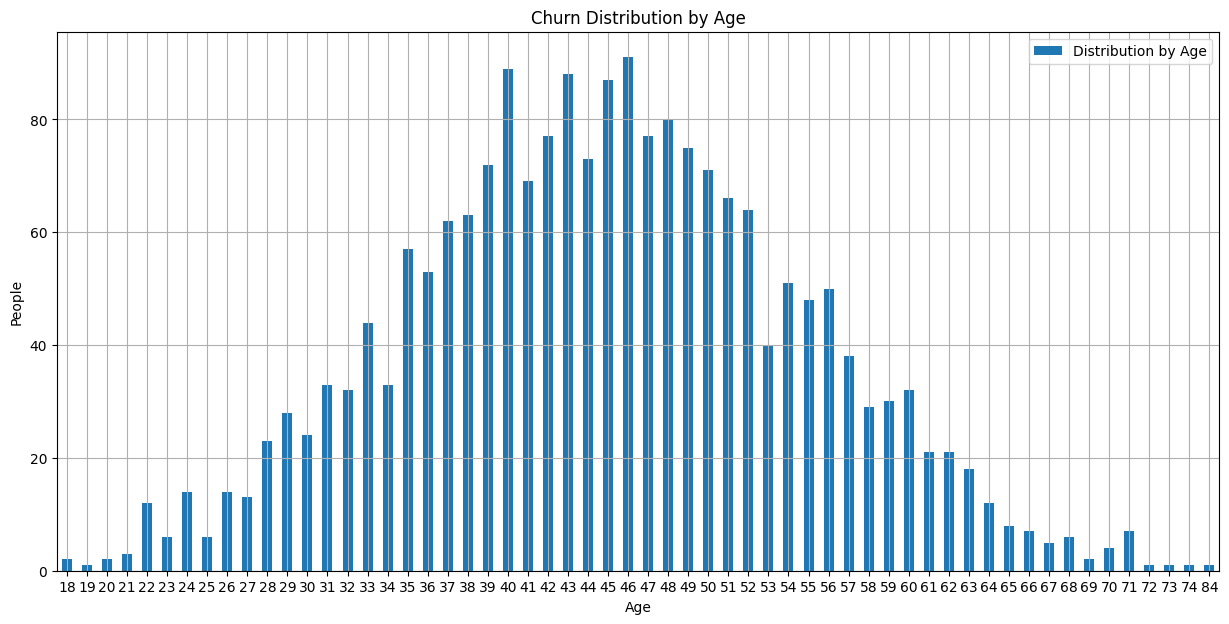

In [11]:
data7 = pd.DataFrame(\
                     df[df["Exited"]==1].groupby(by=["Age"])["CustomerId"]\
                     .count()\
                     .reset_index(name='Distribution by Age'))

data7.sort_values(\
                  by=['Age'], \
                  ascending=True,\
                  inplace=True)


data7.plot(x='Age',
           y=['Distribution by Age'],
           kind='bar',
           grid = True,
           xlabel = 'Age',
           ylabel = 'People',
           figsize=(15,7),
           rot = 0,
           title = 'Churn Distribution by Age',
           table = False,
           secondary_y = False)

Avg Tenure

In [12]:
data8 = pd.DataFrame(\
                     df.groupby(by=["Exited"])["Tenure"]\
                     .mean()\
                     .reset_index(name='Avg Tenure'))
data8

,Exited,Avg Tenure
0,0,5.033279
1,1,4.932744


Avg Annual Balance

In [13]:
data9 = pd.DataFrame(\
                     df.groupby(by=["Exited"])["Balance"]\
                     .mean()\
                     .reset_index(name='Avg Annual Balance'))
data9

,Exited,Avg Annual Balance
0,0,72745.296779
1,1,91108.539337


Avg Product Owned

In [14]:
data10 = pd.DataFrame(\
                     df.groupby(by=["Exited"])["NumOfProducts"]\
                     .mean()\
                     .reset_index(name='Avg Product Owned'))
data10

,Exited,Avg Product Owned
0,0,1.544267
1,1,1.475209


Overal Distribution by HasCrCard

In [15]:
data11 = pd.DataFrame(\
                     df.groupby(by=["HasCrCard"])["CustomerId"]\
                     .count()\
                     .sort_values(ascending=False)\
                     .reset_index(name='Distribution by HasCrCard'))
data11

,HasCrCard,Distribution by HasCrCard
0,1,7055
1,0,2945


Churn Distribution by HasCrCard

In [16]:
data12 = pd.DataFrame(\
                     df[df["Exited"]==1].groupby(by=["HasCrCard"])["CustomerId"]\
                     .count()\
                     .sort_values(ascending=False)\
                     .reset_index(name='Distribution by HasCrCard'))
data12

,HasCrCard,Distribution by HasCrCard
0,1,1424
1,0,613


Overal Disbtribution by Active Member

In [17]:
data13 = pd.DataFrame(\
                     df.groupby(by=["IsActiveMember"])["CustomerId"]\
                     .count()\
                     .sort_values(ascending=False)\
                     .reset_index(name='Distribution by IsActiveMember'))
data13

,IsActiveMember,Distribution by IsActiveMember
0,1,5151
1,0,4849


Churn Disbtribution by Active Member

In [18]:
data14 = pd.DataFrame(\
                     df[df["Exited"]==1].groupby(by=["IsActiveMember"])["CustomerId"]\
                     .count()\
                     .sort_values(ascending=False)\
                     .reset_index(name='Distribution by IsActiveMember'))
data14

,IsActiveMember,Distribution by IsActiveMember
0,0,1302
1,1,735


Avg Estimated Salary

In [19]:
data15 = pd.DataFrame(\
                     df.groupby(by=["Exited"])["EstimatedSalary"]\
                     .mean()\
                     .reset_index(name='Avg Estimated Salary'))
data15

,Exited,Avg Estimated Salary
0,0,99738.391772
1,1,101465.677531


# **Data Preparation**

In [20]:
df.duplicated().sum()

0

In [21]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [22]:
df = df.drop(columns=['Surname', 'RowNumber'])

## **Data Transformation**

In [23]:
predictor = df[df.columns.difference(['CustomerId', 'Exited'])]
predictor.head()

,Age,Balance,CreditScore,EstimatedSalary,Gender,Geography,HasCrCard,IsActiveMember,NumOfProducts,Tenure
0,42,0.00,619,101348.88,Female,France,1,1,1,2
1,41,83807.86,608,112542.58,Female,Spain,0,1,1,1
2,42,159660.80,502,113931.57,Female,France,1,0,3,8
3,39,0.00,699,93826.63,Female,France,0,0,2,1
4,43,125510.82,850,79084.10,Female,Spain,1,1,1,2


In [24]:
predictor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              10000 non-null  int64  
 1   Balance          10000 non-null  float64
 2   CreditScore      10000 non-null  int64  
 3   EstimatedSalary  10000 non-null  float64
 4   Gender           10000 non-null  object 
 5   Geography        10000 non-null  object 
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   NumOfProducts    10000 non-null  int64  
 9   Tenure           10000 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [25]:
predictor = pd.get_dummies(predictor, dtype=int)
predictor.head()

,Age,Balance,CreditScore,EstimatedSalary,HasCrCard,IsActiveMember,NumOfProducts,Tenure,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,42,0.00,619,101348.88,1,1,1,2,1,0,1,0,0
1,41,83807.86,608,112542.58,0,1,1,1,1,0,0,0,1
2,42,159660.80,502,113931.57,1,0,3,8,1,0,1,0,0
3,39,0.00,699,93826.63,0,0,2,1,1,0,1,0,0
4,43,125510.82,850,79084.10,1,1,1,2,1,0,0,0,1


In [26]:
predictor = predictor.drop(columns=['Gender_Male'])

In [85]:
pred_num = predictor.iloc[:, [0,1,2,3,6,7]]
pred_cat = predictor.iloc[:, [4,5,8,9,10,11]]
num = pred_num.columns

In [86]:
from sklearn.preprocessing import StandardScaler
pt = StandardScaler()
pred_num = pd.DataFrame(pt.fit_transform(pred_num))
pred_num.head()

,0,1,2,3,4,5
0,0.293517,-1.225848,-0.326221,0.021886,-0.911583,-1.041760
1,0.198164,0.117350,-0.440036,0.216534,-0.911583,-1.387538
2,0.293517,1.333053,-1.536794,0.240687,2.527057,1.032908
3,0.007457,-1.225848,0.501521,-0.108918,0.807737,-1.387538
4,0.388871,0.785728,2.063884,-0.365276,-0.911583,-1.041760


In [88]:
pred_num.columns = num
pred_num.head()

,Age,Balance,CreditScore,EstimatedSalary,NumOfProducts,Tenure
0,0.293517,-1.225848,-0.326221,0.021886,-0.911583,-1.041760
1,0.198164,0.117350,-0.440036,0.216534,-0.911583,-1.387538
2,0.293517,1.333053,-1.536794,0.240687,2.527057,1.032908
3,0.007457,-1.225848,0.501521,-0.108918,0.807737,-1.387538
4,0.388871,0.785728,2.063884,-0.365276,-0.911583,-1.041760


In [89]:
x = pd.concat([pred_num, pred_cat], axis = 1)
x.head()

,Age,Balance,CreditScore,EstimatedSalary,NumOfProducts,Tenure,HasCrCard,IsActiveMember,Gender_Female,Geography_France,Geography_Germany,Geography_Spain
0,0.293517,-1.225848,-0.326221,0.021886,-0.911583,-1.041760,1,1,1,1,0,0
1,0.198164,0.117350,-0.440036,0.216534,-0.911583,-1.387538,0,1,1,0,0,1
2,0.293517,1.333053,-1.536794,0.240687,2.527057,1.032908,1,0,1,1,0,0
3,0.007457,-1.225848,0.501521,-0.108918,0.807737,-1.387538,0,0,1,1,0,0
4,0.388871,0.785728,2.063884,-0.365276,-0.911583,-1.041760,1,1,1,0,0,1


In [90]:
y = df['Exited']

## **Correlation**

In [92]:
corrtest = x.corr().abs()
corrtest

,Age,Balance,CreditScore,EstimatedSalary,NumOfProducts,Tenure,HasCrCard,IsActiveMember,Gender_Female,Geography_France,Geography_Germany,Geography_Spain
Age,1.000000,0.028308,0.003965,0.007201,0.030680,0.009997,0.011721,0.085472,0.027544,0.039208,0.046897,0.001685
Balance,0.028308,1.000000,0.006268,0.012797,0.304180,0.012254,0.014858,0.010084,0.012087,0.231329,0.401110,0.134892
CreditScore,0.003965,0.006268,1.000000,0.001384,0.012238,0.000842,0.005458,0.025651,0.002857,0.008928,0.005538,0.004780
EstimatedSalary,0.007201,0.012797,0.001384,1.000000,0.014204,0.007784,0.009933,0.011421,0.008112,0.003332,0.010297,0.006482
NumOfProducts,0.030680,0.304180,0.012238,0.014204,1.000000,0.013444,0.003183,0.009612,0.021859,0.001230,0.010419,0.009039
Tenure,0.009997,0.012254,0.000842,0.007784,0.013444,1.000000,0.022583,0.028362,0.014733,0.002848,0.000567,0.003868
HasCrCard,0.011721,0.014858,0.005458,0.009933,0.003183,0.022583,1.000000,0.011866,0.005766,0.002467,0.010577,0.013480
IsActiveMember,0.085472,0.010084,0.025651,0.011421,0.009612,0.028362,0.011866,1.000000,0.022544,0.003317,0.020486,0.016732
Gender_Female,0.027544,0.012087,0.002857,0.008112,0.021859,0.014733,0.005766,0.022544,1.000000,0.006772,0.024628,0.016889
Geography_France,0.039208,0.231329,0.008928,0.003332,0.001230,0.002848,0.002467,0.003317,0.006772,1.000000,0.580359,0.575418


## **Splitting Train-Test Data**

In [95]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=30)

# **Modeling**

1. Logistic Regression
2. Gradient Boosting
3. Random Forest

## Logistic Regression

In [97]:
penalty = ['l2']
tol = [0.001, 0.0001, 0.00001]
C = [100.0, 10.0, 1.00, 0.1, 0.01, 0.001]
fit_intercept = [True, False]
intercept_scaling = [1.0, 0.75, 0.5, 0.25]
class_weight = ['balanced', None]
solver = ['newton-cg', 'sag', 'lbfgs', 'saga']
max_iter=[14000]
param_distributions = dict(penalty=penalty, tol=tol, C=C, fit_intercept=fit_intercept, intercept_scaling=intercept_scaling,
                  class_weight=class_weight, solver=solver, max_iter=max_iter)

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
import time

#cv = cross validation
logreg = LogisticRegression()
grid = GridSearchCV(estimator=logreg, param_grid = param_distributions , scoring = 'recall', cv = 5, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(x_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' s')

Best: 0.711773 using {'C': 0.001, 'class_weight': 'balanced', 'fit_intercept': False, 'intercept_scaling': 1.0, 'max_iter': 14000, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.001}
Execution time: 195.42001390457153 s


## Gradient Boosting

In [100]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, make_scorer,accuracy_score,precision_score,recall_score,f1_score

In [101]:
gbparameter = {'max_depth':[5,10,15],'gamma':[0.0,0.1,0.2,0.3], 'n_estimators':[25,50,75,100],'learning_rate':[0.05,0.1,0.2,0.3], 'scale_pos_weight':[1,3]}
score = {'accuracy':make_scorer(accuracy_score), 'precision':make_scorer(precision_score),'recall':make_scorer(recall_score), 'f1':make_scorer(f1_score)}

In [102]:
GB_Grid = GridSearchCV(XGBClassifier(), gbparameter, cv=5,refit='recall', verbose=0, n_jobs=-1, scoring=score)

In [103]:
start_time = time.time()
GB_result = GB_Grid.fit(x_train, y_train)
# Summarize results
print("Best: %f using %s" % (GB_result.best_score_, GB_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' s')

Best: 0.681615 using {'gamma': 0.3, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 25, 'scale_pos_weight': 3}
Execution time: 63.99067211151123 s


## Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
parameter = {'max_depth':[5,10,15,20],'max_features':['auto','sqrt','log2'], 'n_estimators':[25,50,75,100,125],'min_samples_split':[2,3,5,7]}
score = {'accuracy':make_scorer(accuracy_score), 'precision':make_scorer(precision_score),'recall':make_scorer(recall_score), 'f1':make_scorer(f1_score)}

In [106]:
RF_Grid = GridSearchCV(RandomForestClassifier(), parameter, cv=5,refit='recall', verbose=0, n_jobs=-1, scoring=score)

In [107]:
start_time = time.time()
RF_result = RF_Grid.fit(x_train, y_train)
# Summarize results
print("Best: %f using %s" % (RF_result.best_score_, RF_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' s')

d:\Data Analisis\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
400 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
199 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Data Analisis\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Data Analisis\myenv\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "d:\Data Analisis\myenv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\Data Analisis\myenv\Lib\site-packages\sklear

Best: 0.471235 using {'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 7, 'n_estimators': 25}
Execution time: 59.04085922241211 s


# **Evaluation**

## Logistic Regression

In [108]:
y_pred =grid.predict(x_test)

In [109]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
metrics.completeness_score

Accuracy: 0.7013333333333334
Recall: 0.690671031096563


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

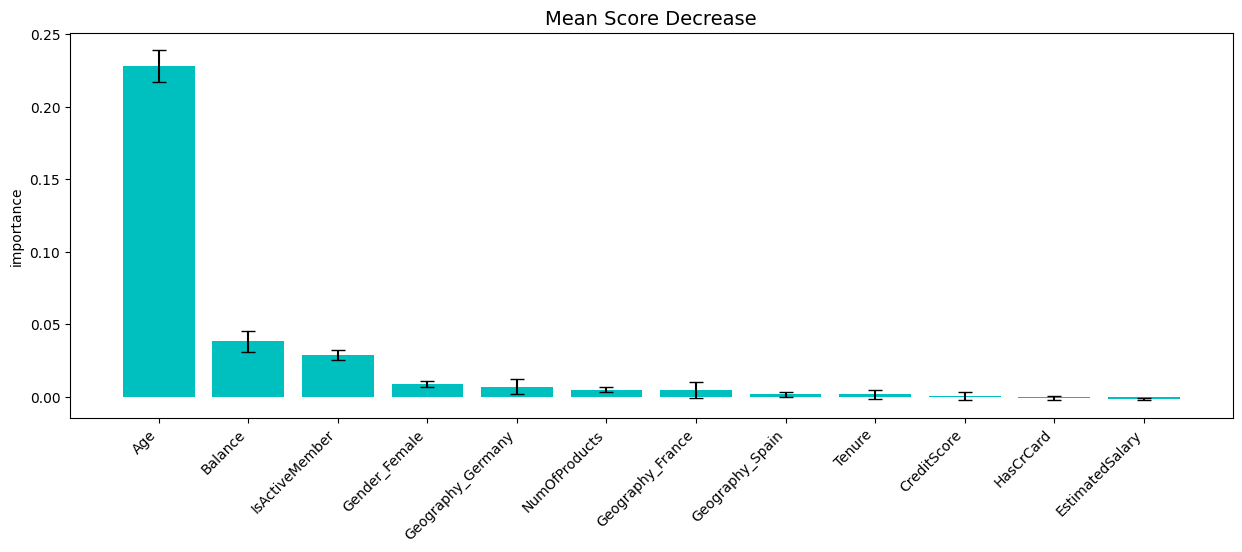

In [110]:
from jcopml.feature_importance import mean_score_decrease
df_imp1 = mean_score_decrease(x_train, y_train, grid, plot= True, topk=20)

## Gradient Boosting

In [111]:
y1_pred =GB_Grid.predict(x_test)

In [112]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y1_pred))
print("Recall:",metrics.recall_score(y_test, y1_pred))
metrics.completeness_score

Accuracy: 0.837
Recall: 0.6808510638297872


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

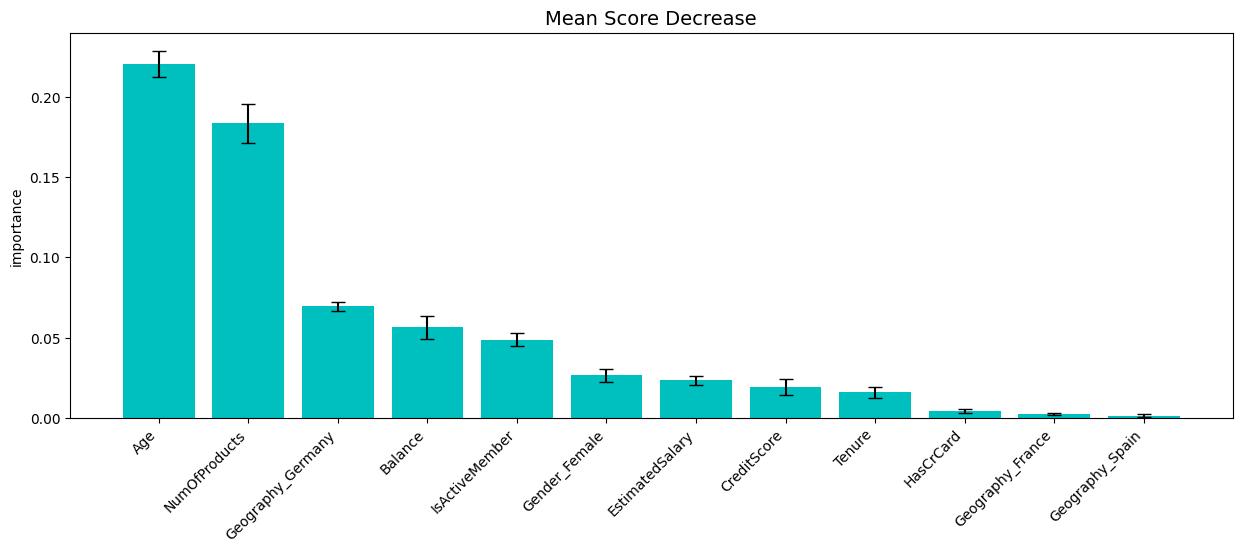

In [113]:
df_imp2 = mean_score_decrease(x_train, y_train, GB_Grid, plot= True, topk=20)

## Random Forest

In [114]:
y2_pred =RF_Grid.predict(x_test)

In [115]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y2_pred))
print("Recall:",metrics.recall_score(y_test, y2_pred))
metrics.completeness_score

Accuracy: 0.8633333333333333
Recall: 0.45499181669394434


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

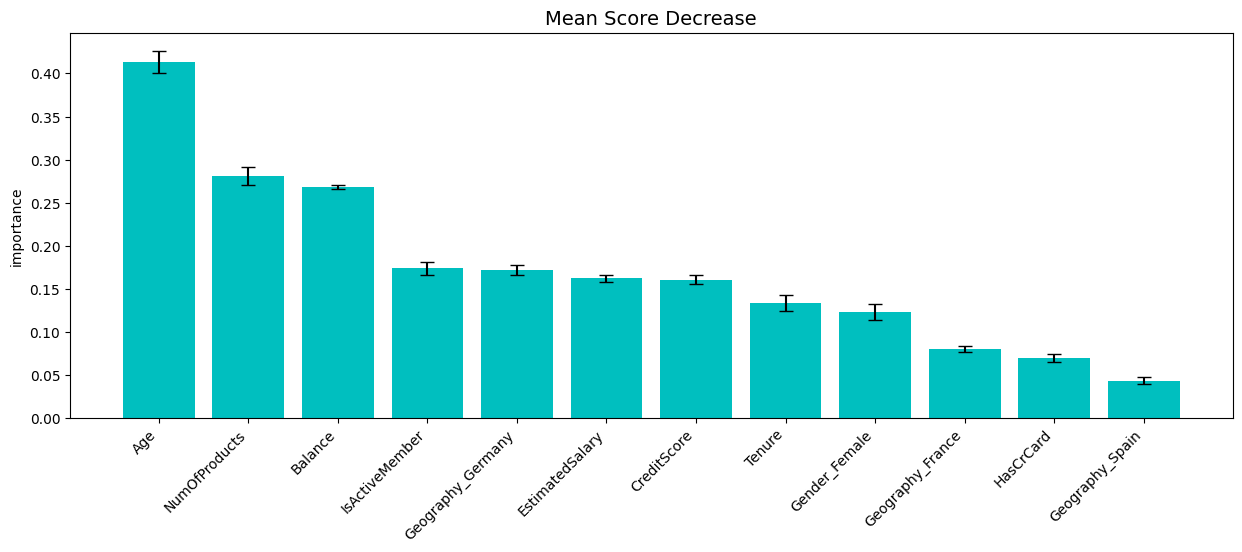

In [116]:
df_imp3 = mean_score_decrease(x_train, y_train, RF_Grid, plot= True, topk=20)

## **Conclusion**

All models have accuracy above 70%. However, one model has a recall of 40% while the other is closer to 70%. Even so, because 2/3 of the models have a recall of almost 70%, it can be said that clients who actually leave the bank can be predicted as clients who leave the bank. So that in this iteration of model development, the desired objectives can be achieved.

Future development solutions that can be implemented are as follows:

1. Increase the sample (number of customers assuming the currently available dataset is not the total customer population)
2. Oversampling the minority class (leaving the bank)
3. Try variations of other variables (adding new variables, or removing variables that have a low importance value in the last result)
5. Try to expand the combination of hyperparameters in model building
6. Try other supervised machine learning algorithms